In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

#Final Report

#Daniel Sullivan 801095863
#David Molnar    801069069      
#Mujeeb Quadri   801157040


obesity = pd.DataFrame(pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv'))
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
# Setting everything to numbers
varlist = ['Gender','family_history_with_overweight','FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
def binary_map(x):
    return x.map({'Male': 1, 'Public_Transportation': 1,'Automobile': 1,'Motorbike': 1, 'yes': 1, 'Obesity_Type_I': 1, 'Obesity_Type_II': 1, 'Obesity_Type_III': 1, 'Always': 1, 'Frequently': 1,'Female': 0, 'Walking': 0, 'Bike': 0, 'no': 0, 'Sometimes':0, "Normal_Weight" : 0, "Overweight_Level_I" : 0, "Overweight_Level_II" : 0, "Insufficient_Weight" : 0})
obesity[varlist] = obesity[varlist].apply(binary_map)

obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,0,0,2.000000,0,0.000000,1.000000,0,1,Normal_Weight
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,0,1,3.000000,1,3.000000,0.000000,0,1,Normal_Weight
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,0,0,2.000000,0,2.000000,1.000000,1,1,Normal_Weight
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,1,0,Overweight_Level_I
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,0,1,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,0,0,1.728139,0,1.676269,0.906247,0,1,Obesity_Type_III
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,0,0,2.005130,0,1.341390,0.599270,0,1,Obesity_Type_III
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,0,0,2.054193,0,1.414209,0.646288,0,1,Obesity_Type_III
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,0,0,2.852339,0,1.139107,0.586035,0,1,Obesity_Type_III


In [3]:
X = obesity.iloc[:,0:16].values
Y = obesity.iloc[:,16].values

In [4]:
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state = 42)

In [5]:
from sklearn.preprocessing import StandardScaler
#Scaling the data using Standardization
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
#Running Logistic Regression first
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

C:\Users\rando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [7]:
Y_pred = classifier.predict(X_test)
Y_pred[0:10]

array(['Insufficient_Weight', 'Obesity_Type_III', 'Insufficient_Weight',
       'Insufficient_Weight', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I',
       'Insufficient_Weight'], dtype=object)

In [8]:
from sklearn.metrics import confusion_matrix 

cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[56,  0,  0,  0,  0,  0,  0],
       [ 9, 42,  0,  0,  0,  8,  3],
       [ 0,  0, 70,  5,  0,  0,  3],
       [ 0,  0,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  4,  0,  0,  0, 42, 10],
       [ 0,  0,  3,  0,  0,  5, 42]], dtype=int64)

In [9]:
"""from sklearn import metrics

allFeaturesAccuracy = metrics.accuracy_score(Y_test, Y_pred)
allFeaturesPrecision = metrics.precision_score(Y_test, Y_pred)
allFeaturesRecall = metrics.recall_score(Y_test, Y_pred)

#Getting the metrics for Logistic Regression
print("Accuracy for all features with Logistic Regression:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision for all features with Logistic Regression:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall for all features with Logistic Regression:",metrics.recall_score(Y_test, Y_pred)) """

'from sklearn import metrics\n\nallFeaturesAccuracy = metrics.accuracy_score(Y_test, Y_pred)\nallFeaturesPrecision = metrics.precision_score(Y_test, Y_pred)\nallFeaturesRecall = metrics.recall_score(Y_test, Y_pred)\n\n#Getting the metrics for Logistic Regression\nprint("Accuracy for all features with Logistic Regression:",metrics.accuracy_score(Y_test, Y_pred)) \nprint("Precision for all features with Logistic Regression:",metrics.precision_score(Y_test, Y_pred)) \nprint("Recall for all features with Logistic Regression:",metrics.recall_score(Y_test, Y_pred)) '

In [10]:
#Running Gaussian Naive Bayes to see if there is a difference
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB() 
classifier.fit(X_train, Y_train)

GaussianNB()

In [11]:
Y2_pred  =  classifier.predict(X_test) 

In [12]:
"""print("Accuracy for all featuers with Naive Bayes:",metrics.accuracy_score(Y_test, Y2_pred)) 
print("Precision for all features with Naive Bayes:",metrics.precision_score(Y_test, Y2_pred)) 
print("Recall for all features with Naive Bayes:",metrics.recall_score(Y_test, Y2_pred)) """

'print("Accuracy for all featuers with Naive Bayes:",metrics.accuracy_score(Y_test, Y2_pred)) \nprint("Precision for all features with Naive Bayes:",metrics.precision_score(Y_test, Y2_pred)) \nprint("Recall for all features with Naive Bayes:",metrics.recall_score(Y_test, Y2_pred)) '

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score 
cm = confusion_matrix(Y_test, Y2_pred) 
cm

array([[53,  0,  2,  0,  0,  1,  0],
       [25, 24,  3,  0,  1,  5,  4],
       [ 0,  0, 40, 27,  0,  2,  9],
       [ 0,  0,  3, 54,  0,  0,  1],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 6,  6, 26,  0,  0, 14,  4],
       [ 0,  2, 24,  5,  0,  1, 18]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

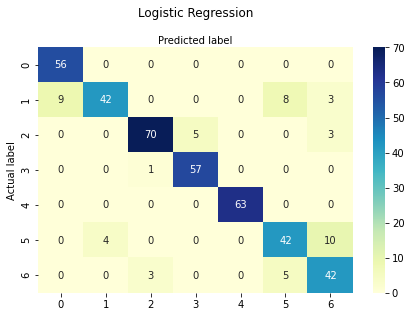

In [14]:
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Logistic Regression', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

Text(0.5, 257.44, 'Predicted label')

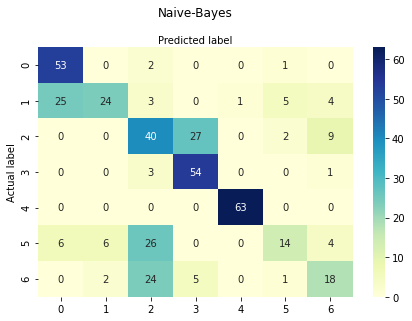

In [15]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Naive-Bayes', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [16]:
#Running PCA to use with Naive Bayes to see if the results are better
from sklearn.decomposition import PCA 
pca = PCA(n_components=8) #Change this to different values to see if evaluation metrics change
principalComponents = pca.fit_transform(X) 
principalDf = pd.DataFrame(data = principalComponents 
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8']) #Change according to n_components
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
0,-22.727956,-2.123318,-0.818382,-0.774638,0.249948,-0.366775,0.108828,0.413843
1,-30.712501,-1.748524,1.990018,0.529741,-1.318923,-0.698617,0.216128,0.292447
2,-9.643065,-0.837784,1.117391,0.134260,0.538992,0.142665,-0.164114,-0.080814
3,0.548466,2.652835,1.182533,0.193029,-0.764428,0.224962,-0.274197,-0.687480
4,3.078465,-2.425543,-1.552173,1.214025,-0.108053,-0.135038,-1.021724,-0.345015
...,...,...,...,...,...,...,...,...
2106,44.586750,-5.678529,0.397173,0.022178,-0.406406,0.687830,0.640637,0.299929
2107,46.972535,-4.783239,0.172139,-0.063862,-0.582471,0.347798,0.428681,0.299297
2108,46.947146,-4.243653,0.258972,-0.030558,-0.547811,0.315979,0.480688,0.306281
2109,46.704647,-2.391934,0.219007,-0.045703,-0.555504,-0.529988,0.483095,0.311199


In [17]:
finalDf = pd.concat([principalDf, obesity[['NObeyesdad']]], axis = 1)

In [18]:
X2_data = finalDf.iloc[:,0:8] #Change these two to match n_components
Y2_data = finalDf.iloc[:,8]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2_data, Y2_data,test_size = 0.2, random_state = 42)
X2_train

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8
162,-26.721248,-1.928040,0.885389,-0.039095,-1.159175,0.119798,0.130064,0.045905
2001,46.797104,-5.848369,0.449933,0.090155,-0.499095,-0.468006,0.564885,0.344062
1435,-4.063241,-1.205131,-1.262824,0.897746,1.296476,-0.900617,0.276435,0.935826
649,-42.429987,-0.257505,-0.249004,0.825706,-1.271755,-0.646567,0.115729,-0.250582
1280,19.525931,0.641612,1.071093,0.210561,-0.136641,-0.566345,0.177082,-0.470268
...,...,...,...,...,...,...,...,...
1638,33.887952,6.194503,0.388514,-0.148916,0.508882,-0.380726,0.690284,-0.589604
1095,-4.981237,-1.045174,-0.564771,0.764918,0.732858,0.541370,-0.227923,-0.206317
1130,-6.646151,-0.999953,-0.691284,-0.706013,1.063638,-0.223049,0.860283,0.442427
1294,-2.152756,-1.197948,-0.142220,-0.340981,0.022337,-0.054333,-0.018153,0.633305


In [19]:
classifier = GaussianNB() 
classifier.fit(X2_train, Y2_train)

GaussianNB()

In [20]:
Y2_pred_PCA = classifier.predict(X2_test)
Y2_pred_PCA[0:10]

array(['Insufficient_Weight', 'Obesity_Type_III', 'Normal_Weight',
       'Insufficient_Weight', 'Overweight_Level_II',
       'Insufficient_Weight', 'Obesity_Type_II', 'Overweight_Level_I',
       'Overweight_Level_I', 'Insufficient_Weight'], dtype='<U19')

In [21]:
"""#Evaluation metrics of Gaussian Naive Bayes with PCA added
print("Accuracy with all features using Naive Bayes with PCA =",metrics.accuracy_score(Y2_test,Y2_pred))
print("Precision with all features using Naive Bayes with PCA =",metrics.precision_score(Y2_test,Y2_pred))
print("Recall with all features using Naive Bayes with PCA =",metrics.recall_score(Y2_test,Y2_pred))"""
cm_PCA = confusion_matrix(Y_test, Y2_pred_PCA)

Text(0.5, 257.44, 'Predicted label')

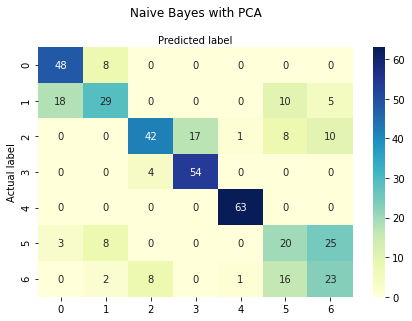

In [22]:
import seaborn as sns 
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cm_PCA), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Naive Bayes with PCA', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [23]:
#Now to use only part of the features, namely just the characteristics of the person and the lifestyle choices seperately

In [24]:
X_char = obesity.iloc[:,0:5].values

In [25]:
from sklearn.model_selection import train_test_split 
Xchar_train, Xchar_test, Ychar_train, Ychar_test = train_test_split(X_char, Y,test_size = 0.2, random_state = 42)

In [26]:
from sklearn.preprocessing import StandardScaler
#Scaling the data using Standardization
sc_Xchar = StandardScaler()
Xchar_train = sc_Xchar.fit_transform(Xchar_train)
Xchar_test = sc_Xchar.transform(Xchar_test)

In [27]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0)
classifier.fit(Xchar_train, Ychar_train)

LogisticRegression(random_state=0)

In [28]:
Ychar_pred = classifier.predict(Xchar_test)
Ychar_pred[0:10]

array(['Insufficient_Weight', 'Obesity_Type_III', 'Insufficient_Weight',
       'Insufficient_Weight', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_II', 'Overweight_Level_I', 'Obesity_Type_I',
       'Insufficient_Weight'], dtype=object)

In [29]:
from sklearn.metrics import confusion_matrix 

cnf_char_matrix = confusion_matrix(Ychar_test, Ychar_pred)
cnf_char_matrix

array([[56,  0,  0,  0,  0,  0,  0],
       [11, 43,  0,  0,  0,  6,  2],
       [ 0,  0, 71,  6,  0,  0,  1],
       [ 0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 0,  2,  0,  0,  0, 45,  9],
       [ 0,  0,  4,  0,  0,  8, 38]], dtype=int64)

In [30]:
from sklearn import metrics

"""charAccuracy = metrics.accuracy_score(Ychar_test, Ychar_pred)
charPrecision = metrics.precision_score(Ychar_test, Ychar_pred)
charRecall = metrics.recall_score(Ychar_test, Ychar_pred)

#Getting the metrics for Logistic Regression
print("Accuracy for only characteristics with Logistic Regression:",metrics.accuracy_score(Ychar_test, Ychar_pred)) 
print("Precision for only characteristics with Logistic Regression:",metrics.precision_score(Ychar_test, Ychar_pred)) 
print("Recall for only characteristics with Logistic Regression:",metrics.recall_score(Ychar_test, Ychar_pred)) """

'charAccuracy = metrics.accuracy_score(Ychar_test, Ychar_pred)\ncharPrecision = metrics.precision_score(Ychar_test, Ychar_pred)\ncharRecall = metrics.recall_score(Ychar_test, Ychar_pred)\n\n#Getting the metrics for Logistic Regression\nprint("Accuracy for only characteristics with Logistic Regression:",metrics.accuracy_score(Ychar_test, Ychar_pred)) \nprint("Precision for only characteristics with Logistic Regression:",metrics.precision_score(Ychar_test, Ychar_pred)) \nprint("Recall for only characteristics with Logistic Regression:",metrics.recall_score(Ychar_test, Ychar_pred)) '

Text(0.5, 257.44, 'Predicted label')

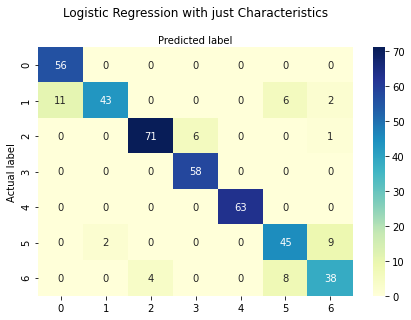

In [31]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_char_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Logistic Regression with just Characteristics', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [32]:
classifier = GaussianNB() 
classifier.fit(Xchar_train, Ychar_train)

GaussianNB()

In [33]:
Y2char_pred  =  classifier.predict(Xchar_test) 
cnf_char_NB = confusion_matrix(Ychar_test, Y2char_pred)
cnf_char_NB

array([[40,  6,  0,  0, 10,  0,  0],
       [15, 15,  0,  0, 13, 10,  9],
       [ 0,  0, 20, 34, 21,  1,  2],
       [ 0,  0,  1, 57,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 3, 11,  7,  0, 18,  6, 11],
       [ 0,  0,  8,  7, 13,  1, 21]], dtype=int64)

In [34]:
"""print("Accuracy for only characteristics with Naive Bayes:",metrics.accuracy_score(Ychar_test, Y2char_pred)) 
print("Precision for only characteristics with Naive Bayes:",metrics.precision_score(Ychar_test, Y2char_pred)) 
print("Recall for only characteristics with Naive Bayes:",metrics.recall_score(Ychar_test, Y2char_pred)) """

'print("Accuracy for only characteristics with Naive Bayes:",metrics.accuracy_score(Ychar_test, Y2char_pred)) \nprint("Precision for only characteristics with Naive Bayes:",metrics.precision_score(Ychar_test, Y2char_pred)) \nprint("Recall for only characteristics with Naive Bayes:",metrics.recall_score(Ychar_test, Y2char_pred)) '

Text(0.5, 257.44, 'Predicted label')

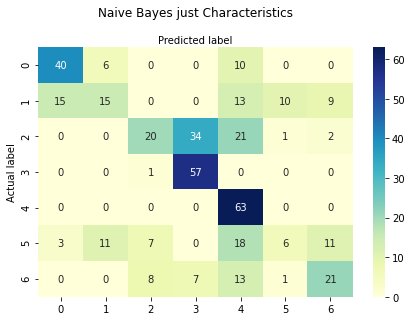

In [35]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_char_NB), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Naive Bayes just Characteristics', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [36]:
pca = PCA(n_components=3) #Change this to different values to see if evaluation metrics change
principalComponents = pca.fit_transform(X_char) 
principalDf_char = pd.DataFrame(data = principalComponents 
             , columns = ['principal component 1', 'principal component 2', 'principal component 3']) #Change according to n_components
principalDf_char

,principal component 1,principal component 2,principal component 3
0,-22.727218,-2.133353,0.425025
1,-30.716323,-1.717344,0.408409
2,-9.637945,-0.811017,-0.541186
3,0.548614,2.657399,-0.472257
4,3.085061,-2.481228,-0.467074
...,...,...,...
2106,44.587075,-5.660358,0.644504
2107,46.970572,-4.777049,0.649733
2108,46.945160,-4.233920,0.649866
2109,46.698344,-2.380708,0.652420


In [37]:
finalDf_char = pd.concat([principalDf_char, obesity[['NObeyesdad']]], axis = 1)

In [38]:
X2char_data = finalDf_char.iloc[:,0:3] #Change these two to match n_components
Y2char_data = finalDf_char.iloc[:,3]

X2char_train, X2char_test, Y2char_train, Y2char_test = train_test_split(X2char_data, Y2char_data,test_size = 0.2, random_state = 42)
X2char_train

,principal component 1,principal component 2,principal component 3
162,-26.721672,-1.925464,0.410373
2001,46.791572,-5.827132,0.647529
1435,-4.058408,-1.202861,0.486266
649,-42.427703,-0.275489,0.392096
1280,19.519587,0.670063,-0.439845
...,...,...,...
1638,33.883653,6.226309,-0.377963
1095,-4.974584,-1.053592,-0.516748
1130,-6.645953,-0.977934,0.478799
1294,-2.153700,-1.201544,0.496407


In [39]:
classifier = GaussianNB() 
classifier.fit(X2char_train, Y2char_train)

GaussianNB()

In [40]:
Y3char_pred = classifier.predict(X2char_test)
cnf_char_NB_PCA = confusion_matrix(Y2char_test, Y3char_pred)
cnf_char_NB_PCA

array([[49,  7,  0,  0,  0,  0,  0],
       [21, 18,  0,  0,  0, 20,  3],
       [ 0,  0, 29, 26,  1, 11, 11],
       [ 0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 3, 10,  0,  0,  0, 28, 15],
       [ 0,  3,  5,  3,  0, 19, 20]], dtype=int64)

In [41]:
"""print("Accuracy with only characteristics, Naive Bayes, and PCA =",metrics.accuracy_score(Y2char_test,Y3char_pred))
print("Precision with only characteristics, Naive Bayes, and PCA =",metrics.precision_score(Y2char_test,Y3char_pred))
print("Recall with only characteristics, Naive Bayes, and PCA =",metrics.recall_score(Y2char_test,Y3char_pred))"""

'print("Accuracy with only characteristics, Naive Bayes, and PCA =",metrics.accuracy_score(Y2char_test,Y3char_pred))\nprint("Precision with only characteristics, Naive Bayes, and PCA =",metrics.precision_score(Y2char_test,Y3char_pred))\nprint("Recall with only characteristics, Naive Bayes, and PCA =",metrics.recall_score(Y2char_test,Y3char_pred))'

Text(0.5, 257.44, 'Predicted label')

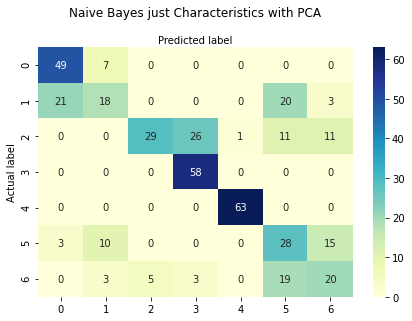

In [42]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_char_NB_PCA), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Naive Bayes just Characteristics with PCA', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [43]:
#Now to test only the lifestyle choices of the individual





In [44]:
X_life = obesity.iloc[:,5:16].values

In [45]:
X_life_train, X_life_test, Y_life_train, Y_life_test = train_test_split(X_life, Y,test_size = 0.2, random_state = 42)

In [46]:
#Scaling the data using Standardization
sc_X_life = StandardScaler()
X_life_train = sc_X_life.fit_transform(X_life_train)
X_life_test = sc_X_life.transform(X_life_test)

In [47]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_life_train, Y_life_train)

LogisticRegression(random_state=0)

In [48]:
Y_life_pred = classifier.predict(X_life_test)

In [49]:
cnf_life_matrix = confusion_matrix(Y_life_test, Y_life_pred)
cnf_life_matrix

array([[25,  8, 11,  3,  5,  2,  2],
       [17, 14,  6, 10,  4,  4,  7],
       [ 1,  3, 48, 13,  6,  5,  2],
       [ 2,  0, 26, 23,  6,  0,  1],
       [ 0,  0,  0,  0, 63,  0,  0],
       [ 5,  3, 15, 17,  3, 10,  3],
       [ 2,  2, 18,  8,  2,  3, 15]], dtype=int64)

In [50]:
"""lifeAccuracy = metrics.accuracy_score(Y_life_test, Y_life_pred)
lifePrecision = metrics.precision_score(Y_life_test, Y_life_pred)
lifeRecall = metrics.recall_score(Y_life_test, Y_life_pred)

#Getting the metrics for Logistic Regression
print("Accuracy for only lifestyle choices with Logistic Regression:",metrics.accuracy_score(Y_life_test, Y_life_pred)) 
print("Precision for only lifestyle choices with Logistic Regression:",metrics.precision_score(Y_life_test, Y_life_pred)) 
print("Recall for only lifestyle choices with Logistic Regression:",metrics.recall_score(Y_life_test, Y_life_pred)) """

'lifeAccuracy = metrics.accuracy_score(Y_life_test, Y_life_pred)\nlifePrecision = metrics.precision_score(Y_life_test, Y_life_pred)\nlifeRecall = metrics.recall_score(Y_life_test, Y_life_pred)\n\n#Getting the metrics for Logistic Regression\nprint("Accuracy for only lifestyle choices with Logistic Regression:",metrics.accuracy_score(Y_life_test, Y_life_pred)) \nprint("Precision for only lifestyle choices with Logistic Regression:",metrics.precision_score(Y_life_test, Y_life_pred)) \nprint("Recall for only lifestyle choices with Logistic Regression:",metrics.recall_score(Y_life_test, Y_life_pred)) '

Text(0.5, 257.44, 'Predicted label')

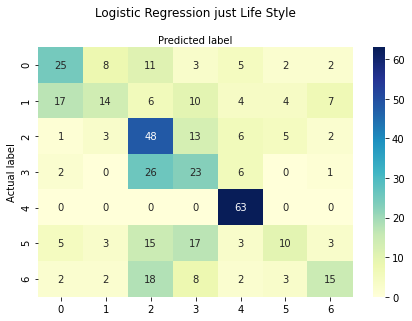

In [51]:
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_life_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Logistic Regression just Life Style', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [52]:
classifier = GaussianNB() 
classifier.fit(X_life_train, Y_life_train)

GaussianNB()

Text(0.5, 257.44, 'Predicted label')

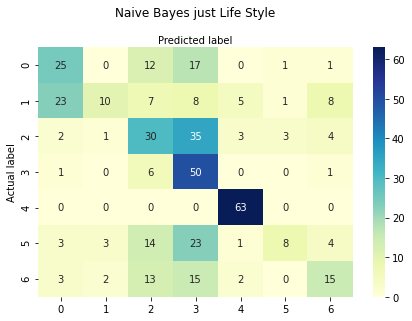

In [53]:
Y2_life_pred  =  classifier.predict(X_life_test) 
cnf_life_NB = confusion_matrix(Y_life_test, Y2_life_pred)
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_life_NB), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Naive Bayes just Life Style', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [54]:
"""print("Accuracy for only Naive Bayes:",metrics.accuracy_score(Y_life_test, Y2_life_pred)) 
print("Precision for Naive Bayes:",metrics.precision_score(Y_life_test, Y2_life_pred)) 
print("Recall for Naive Bayes:",metrics.recall_score(Y_life_test, Y2_life_pred)) """

'print("Accuracy for only Naive Bayes:",metrics.accuracy_score(Y_life_test, Y2_life_pred)) \nprint("Precision for Naive Bayes:",metrics.precision_score(Y_life_test, Y2_life_pred)) \nprint("Recall for Naive Bayes:",metrics.recall_score(Y_life_test, Y2_life_pred)) '

In [55]:
pca = PCA(n_components=6) #Change this to different values to see if evaluation metrics change
principalComponents = pca.fit_transform(X_life) 
principalDf_life = pd.DataFrame(data = principalComponents 
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5', 'principal component 6']) #Change according to n_components
principalDf_life

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
0,-0.699965,-0.686166,0.384574,0.278988,0.293901,0.473098
1,2.088562,0.675158,-1.120662,0.137725,-0.181856,0.496883
2,1.045874,0.198064,0.448007,-0.157789,0.293081,0.419330
3,1.026053,0.179235,-0.765853,-0.491981,-0.325431,0.418051
4,-1.655237,1.110104,-0.465290,-0.015019,0.504607,0.490162
...,...,...,...,...,...,...
2106,0.688083,-0.034920,0.113215,-0.266518,-0.634525,-0.306146
2107,0.431736,-0.159420,-0.254946,-0.061262,-0.488470,-0.256838
2108,0.509013,-0.124422,-0.229341,-0.016484,-0.494783,-0.254793
2109,0.434136,-0.186713,-0.561092,0.730134,-0.335723,-0.141409


In [56]:
finalDf_life = pd.concat([principalDf_life, obesity[['NObeyesdad']]], axis = 1)

In [57]:
X2_life_data = finalDf_life.iloc[:,0:6] #Change these two to match n_components
Y2_life_data = finalDf_life.iloc[:,6]

X2_life_train, X2_life_test, Y2_life_train, Y2_life_test = train_test_split(X2_life_data, Y2_life_data,test_size = 0.2, random_state = 42)
X2_life_train

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6
162,0.975785,0.107524,-0.721751,-0.564255,-0.383663,0.500903
2001,0.753535,-0.036277,-0.397618,0.757323,-0.390946,-0.155901
1435,-1.161207,0.899462,1.036982,1.269776,0.882924,0.089244
649,-0.225569,0.947056,-0.967276,0.126776,-0.363368,1.187474
1280,1.027936,0.106803,-0.465507,0.618722,-0.364380,-0.183766
...,...,...,...,...,...,...
1638,0.264834,-0.292223,0.207750,0.768427,-0.601503,-0.149936
1095,-0.649283,0.771680,0.670534,-0.333678,0.132133,-0.199995
1130,-0.531000,-0.650664,1.292397,0.684725,-0.008951,-0.081537
1294,-0.040311,-0.304920,0.101067,0.023401,0.372065,-0.159379


In [58]:
classifier = GaussianNB() 
classifier.fit(X2_life_train, Y2_life_train)

GaussianNB()

Text(0.5, 257.44, 'Predicted label')

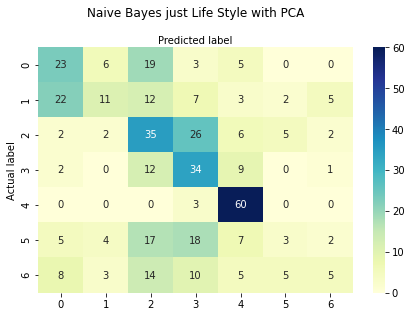

In [59]:
Y3_life_pred = classifier.predict(X2_life_test)
cnf_life_NB_PCA = confusion_matrix(Y2_life_test, Y3_life_pred)
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_life_NB_PCA), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Naive Bayes just Life Style with PCA', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label') 

In [60]:
#These results are using 
"""print("Accuracy with only life style, Naive Bayes, and PCA =",metrics.accuracy_score(Y2_life_test,Y3_life_pred))
print("Precision with only life style, Naive Bayes, and PCA =",metrics.precision_score(Y2_life_test,Y3_life_pred))
print("Recall with only life style, Naive Bayes, and PCA =",metrics.recall_score(Y2_life_test,Y3_life_pred))"""

'print("Accuracy with only life style, Naive Bayes, and PCA =",metrics.accuracy_score(Y2_life_test,Y3_life_pred))\nprint("Precision with only life style, Naive Bayes, and PCA =",metrics.precision_score(Y2_life_test,Y3_life_pred))\nprint("Recall with only life style, Naive Bayes, and PCA =",metrics.recall_score(Y2_life_test,Y3_life_pred))'

In [61]:
#Now to do this with SVM instead




In [ ]:
from sklearn.svm import SVC 
model = SVC(kernel='linear', C=1E10) 
model.fit(X, Y) 